In [1]:
import numpy as np
import pandas as pd 
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
from PIL import Image
from sklearn.utils import resample
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from transformers import RobertaTokenizer
from transformers import TFRobertaModel
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.layers import Flatten
from sklearn.metrics import precision_recall_curve

import tensorflow as tf
from sklearn.metrics import roc_auc_score, roc_curve,auc
from keras import regularizers
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix,f1_score,classification_report
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn.metrics import average_precision_score
from itertools import cycle

lemma = WordNetLemmatizer()
stopword = set(STOPWORDS)
nltk.download('omw-1.4')
%matplotlib inline
import nltk
nltk.download('stopwords')
import nltk
nltk.download('wordnet')


from nltk.corpus import brown
nltk.download("brown")
import warnings
warnings.filterwarnings("ignore")


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\alexh\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alexh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\alexh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\alexh\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


# Import Train Data

# Data preprocessing

In [2]:
%cd ../../../../..
%cd C:/Users/alexh/PycharmProjects/proj_bach

C:\
C:\Users\alexh\PycharmProjects\proj_bach


In [3]:
from data_retriever import data1, data2

File simple_emotions.txt already exists. Not overwriting.
File simple_sentiments.txt already exists. Not overwriting.
File clean_tweet_emotions.txt already exists. Not overwriting.
File clean_tweet_sentiments.txt already exists. Not overwriting.
                                                Text Sentiment
0  During the period of falling in love, each tim...  Positive
1         When I was involved in a traffic accident.  Negative
2  When I was driving home after  several days of...  Negative
3   When I lost the person who meant the most to me.  Negative
4  The time I knocked a deer down - the sight of ...  Negative
Index(['Text', 'Sentiment'], dtype='object')
                                                   Text Sentiment
0     During the period of falling in love, each tim...  Positive
1            When I was involved in a traffic accident.  Negative
2     When I was driving home after  several days of...  Negative
3      When I lost the person who meant the most to me.  Negative
4

In [4]:
def clean_text(tweet):
    tweets = " ".join(filter(lambda x: x[0]!= '@' , tweet.split()))
    tweets = re.sub('[^a-zA-Z]', ' ', tweets)
    tweets = tweets.lower()
    tweets = tweets.split()
    tweets = [word for word in tweets if not word in set(stopwords.words('english'))]
    tweets = [lemma.lemmatize(word) for word in tweets]
    tweets = " ".join(tweets)
    return tweets

In [5]:
train_data = data1.astype(str).copy()

In [6]:
train_data['clean_tweet_text'] = train_data.Text.apply(clean_text)

In [7]:
print(train_data.head())

                                                Text Sentiment  \
0  During the period of falling in love, each tim...  Positive   
1         When I was involved in a traffic accident.  Negative   
2  When I was driving home after  several days of...  Negative   
3   When I lost the person who meant the most to me.  Negative   
4  The time I knocked a deer down - the sight of ...  Negative   

                                    clean_tweet_text  
0  period falling love time met especially met lo...  
1                          involved traffic accident  
2  driving home several day hard work motorist ah...  
3                                  lost person meant  
4  time knocked deer sight animal injury helpless...  


In [8]:
train_data=train_data.drop(["Text"],axis=1)

In [9]:
train_data.head()

,Sentiment,clean_tweet_text
0,Positive,period falling love time met especially met lo...
1,Negative,involved traffic accident
2,Negative,driving home several day hard work motorist ah...
3,Negative,lost person meant
4,Negative,time knocked deer sight animal injury helpless...


In [10]:
max_len=128
text_data=train_data["clean_tweet_text"]
label_data=train_data["Sentiment"]

# roberta_tokenizer

In [11]:
roberta_tokenizer = RobertaTokenizer.from_pretrained("roberta-base")

# roberta_model

In [12]:
import tensorflow as tf
print(tf.reduce_sum(tf.random.normal([1000, 1000])))

tf.Tensor(969.34467, shape=(), dtype=float32)


In [13]:
roberta_model = TFRobertaModel.from_pretrained("roberta-base")

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaModel: ['lm_head.dense.bias', 'lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'roberta.embeddings.position_ids']
- This IS expected if you are initializing TFRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaModel were not initialized from the PyTorch model and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and infe

# Sample Text

In [14]:
text_data[1300]

'somebody know well discovered told lie'

In [15]:
encode_data=roberta_tokenizer.encode_plus(text_data[1300],add_special_tokens = True,max_length =40,pad_to_max_length = True,truncation=True)

In [16]:
encode_data

{'input_ids': [0, 12465, 9773, 216, 157, 2967, 174, 6105, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}

In [17]:
test_input_id=np.asarray(encode_data['input_ids'])
test_attention_mask=np.asarray(encode_data['attention_mask'])


In [18]:
print(test_input_id.shape)
print(test_attention_mask.shape)

print(test_attention_mask.reshape(1,-1).shape)

(40,)
(40,)
(1, 40)


In [19]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [20]:
import transformers

In [21]:
print(isinstance(roberta_model, transformers.TFRobertaModel))  # Should return True


True


In [22]:
output_data=roberta_model([test_input_id.reshape(1,-1),test_attention_mask.reshape(1,-1)])

type(output_data)

transformers.modeling_tf_outputs.TFBaseModelOutputWithPoolingAndCrossAttentions

In [23]:
output_data

TFBaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=<tf.Tensor: shape=(1, 40, 768), dtype=float32, numpy=
array([[[-0.05656375,  0.05431781, -0.01716923, ..., -0.06862339,
         -0.06087324, -0.01663019],
        [-0.22868943, -0.23910716, -0.01222507, ...,  0.29204032,
         -0.04429658,  0.17198972],
        [ 0.09318247, -0.10966877, -0.2640286 , ..., -0.12940614,
         -0.03594225,  0.06795804],
        ...,
        [-0.07438122, -0.10028975, -0.01777137, ..., -0.18840905,
         -0.06338486,  0.05056664],
        [-0.07438122, -0.10028975, -0.01777137, ..., -0.18840905,
         -0.06338486,  0.05056664],
        [-0.07438122, -0.10028975, -0.01777137, ..., -0.18840905,
         -0.06338486,  0.05056664]]], dtype=float32)>, pooler_output=<tf.Tensor: shape=(1, 768), dtype=float32, numpy=
array([[-0.32167432, -0.26477838, -0.01329902, -0.20126598, -0.15743142,
        -0.16728404, -0.24815425,  0.2930095 , -0.14245425,  0.02399181,
        -0.11459146, -0.063

In [24]:
roberta_tokenizer.decode(encode_data["input_ids"])

'<s>somebody know well discovered told lie</s><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>'

In [25]:
final_text_data=train_data["clean_tweet_text"]
final_label_data=np.array(label_data)

In [26]:
#new_final_label_data = np.array([0 if label=="Negative" else 1 if label=="neutral" else 2 for label in label_data])

In [27]:
new_final_label_data = np.array([0 if label=="Negative" else 1 for label in label_data])

In [28]:
print(new_final_label_data[:25])

[1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0]


In [29]:
def roberta_encode(final_text_data,max_len):
    input_ids=[]
    attention_masks=[]
    
    for i in range(len(final_text_data)):
        encode_data=roberta_tokenizer.encode_plus(final_text_data[i],add_special_tokens=True,max_length=max_len,pad_to_max_length=True,return_attention_mask=True)
        input_ids.append(encode_data['input_ids'])
        attention_masks.append(encode_data["attention_mask"])
    return np.array(input_ids),np.array(attention_masks)
        

In [30]:
text_input_ids,text_attention_masks = roberta_encode(final_text_data,max_len)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


In [31]:
print('Text Input Ids Shape {} \nText Input Attention Mask Shape {} \nLabel Data shape {}'.format(text_input_ids.shape,text_attention_masks.shape,new_final_label_data.shape))

Text Input Ids Shape (7480, 128) 
Text Input Attention Mask Shape (7480, 128) 
Label Data shape (7480,)


In [32]:
X_train_input,X_test_input,Y_train_label,Y_test_label,train_mask,test_mask=train_test_split(text_input_ids,new_final_label_data,text_attention_masks,test_size=0.9,random_state=42,shuffle=True)

In [33]:
print('Train input shape {}\nTest input shape {}\nTrain label shape {}\nTest label shape {}\nTrain attention mask shape {}\nTest attention mask shape {}'.format(X_train_input.shape,X_test_input.shape,Y_train_label.shape,Y_test_label.shape,train_mask.shape,test_mask.shape))

Train input shape (748, 128)
Test input shape (6732, 128)
Train label shape (748,)
Test label shape (6732,)
Train attention mask shape (748, 128)
Test attention mask shape (6732, 128)


In [34]:
print(Y_train_label)

[0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0
 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 0 1 0 0 0 0 0 0 

# Create Roberta Model

In [35]:
from tensorflow.keras.layers import LeakyReLU


In [36]:
def Create_Roberta_Model():
    input_ids=tf.keras.Input(shape=(max_len,),dtype="int32")
    attention_masks=tf.keras.Input(shape=(max_len,),dtype="int32")
    
    roberta_model = TFRobertaModel.from_pretrained("roberta-base")
    output_dim = roberta_model(input_ids=input_ids, attention_mask=attention_masks)[0][:,0,:]
    
    dense_layer = tf.keras.layers.Dense(32, activation="relu")(output_dim)
    dropout = tf.keras.layers.Dropout(0.3)(dense_layer)
    final_layer = tf.keras.layers.Dense(2, activation='softmax')(dropout)

    model = tf.keras.models.Model(inputs=[input_ids, attention_masks], outputs=final_layer)
    
    return model


In [37]:
model=Create_Roberta_Model()

loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)

optimizer = tf.keras.optimizers.Adam(lr=1e-5)

model.compile(loss=loss,optimizer=optimizer, metrics=["accuracy"])

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaModel: ['lm_head.dense.bias', 'lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'roberta.embeddings.position_ids']
- This IS expected if you are initializing TFRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaModel were not initialized from the PyTorch model and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and infe

In [38]:
with tf.GradientTape() as tape:
    predictions = model([X_train_input[:1], train_mask[:1]], training=True)
    loss = tf.keras.losses.sparse_categorical_crossentropy(Y_train_label[:1], predictions)
grads = tape.gradient(loss, model.trainable_weights)
for grad, weight in zip(grads, model.trainable_weights):
    if grad is not None:
        print(f"Gradient for {weight.name} is okay")
    else:
        print(f"No gradient for {weight.name}")

Gradient for tf_roberta_model_1/roberta/encoder/layer_._0/attention/self/query/kernel:0 is okay
Gradient for tf_roberta_model_1/roberta/encoder/layer_._0/attention/self/query/bias:0 is okay
Gradient for tf_roberta_model_1/roberta/encoder/layer_._0/attention/self/key/kernel:0 is okay
Gradient for tf_roberta_model_1/roberta/encoder/layer_._0/attention/self/key/bias:0 is okay
Gradient for tf_roberta_model_1/roberta/encoder/layer_._0/attention/self/value/kernel:0 is okay
Gradient for tf_roberta_model_1/roberta/encoder/layer_._0/attention/self/value/bias:0 is okay
Gradient for tf_roberta_model_1/roberta/encoder/layer_._0/attention/output/dense/kernel:0 is okay
Gradient for tf_roberta_model_1/roberta/encoder/layer_._0/attention/output/dense/bias:0 is okay
Gradient for tf_roberta_model_1/roberta/encoder/layer_._0/attention/output/LayerNorm/gamma:0 is okay
Gradient for tf_roberta_model_1/roberta/encoder/layer_._0/attention/output/LayerNorm/beta:0 is okay
Gradient for tf_roberta_model_1/roberta

In [39]:
history=model.fit([X_train_input,train_mask],Y_train_label,batch_size=16,epochs=10,validation_data=([X_test_input,test_mask],Y_test_label))

Epoch 1/10
47/47 [==============================] - 58s 888ms/step - loss: 0.4893 - accuracy: 0.8289 - val_loss: 0.3847 - val_accuracy: 0.8543
Epoch 2/10
47/47 [==============================] - 39s 843ms/step - loss: 0.3607 - accuracy: 0.8690 - val_loss: 0.2954 - val_accuracy: 0.8687
Epoch 3/10
47/47 [==============================] - 37s 809ms/step - loss: 0.2019 - accuracy: 0.9198 - val_loss: 0.2911 - val_accuracy: 0.8480
Epoch 4/10
47/47 [==============================] - 37s 810ms/step - loss: 0.1732 - accuracy: 0.9198 - val_loss: 0.2379 - val_accuracy: 0.8936
Epoch 5/10
47/47 [==============================] - 41s 888ms/step - loss: 0.1111 - accuracy: 0.9586 - val_loss: 0.2667 - val_accuracy: 0.9144
Epoch 6/10
47/47 [==============================] - 40s 873ms/step - loss: 0.0583 - accuracy: 0.9826 - val_loss: 0.3251 - val_accuracy: 0.9046
Epoch 7/10
47/47 [==============================] - 39s 851ms/step - loss: 0.0454 - accuracy: 0.9853 - val_loss: 0.4249 - val_accuracy: 0.8968

In [40]:
def model_loss_and_accuracy(history):
    
    fig=plt.figure(figsize=(15,15))
    plt.subplot(221)
    plt.plot(history.history["accuracy"],marker="o",linestyle=":",markersize=10,color="m",label="accuracy")
    plt.plot(history.history["val_accuracy"],marker="D",linestyle=":",markersize=10,color="b",label="val_accuracy")
    plt.title("Model Accuracy\n",fontsize=20,color="darkorange")
    plt.xlabel("Number of Epochs",color="midnightblue",fontsize=15)
    plt.ylabel("Accuracy",color="midnightblue",fontsize=15)
    plt.grid(color = 'green', linestyle = '--', linewidth = 1)
    plt.legend(loc="best")
    plt.tight_layout()
    
  
    plt.subplot(222)
    plt.plot(history.history["accuracy"],marker="v",linestyle="-.",markersize=10,color="g",label="accuracy")
    plt.plot(history.history["val_accuracy"],marker="s",linestyle="--",markersize=10,color="r",label="val_accuracy")
    plt.title("Model Loss\n",fontsize=20,color="limegreen")
    plt.xlabel("Number of Epochs",color="midnightblue",fontsize=15)
    plt.ylabel("Loss",color="midnightblue",fontsize=15)
    plt.grid(color = 'green', linestyle = '--', linewidth = 1)
    plt.legend(loc="best")
    plt.tight_layout()
    plt.show()

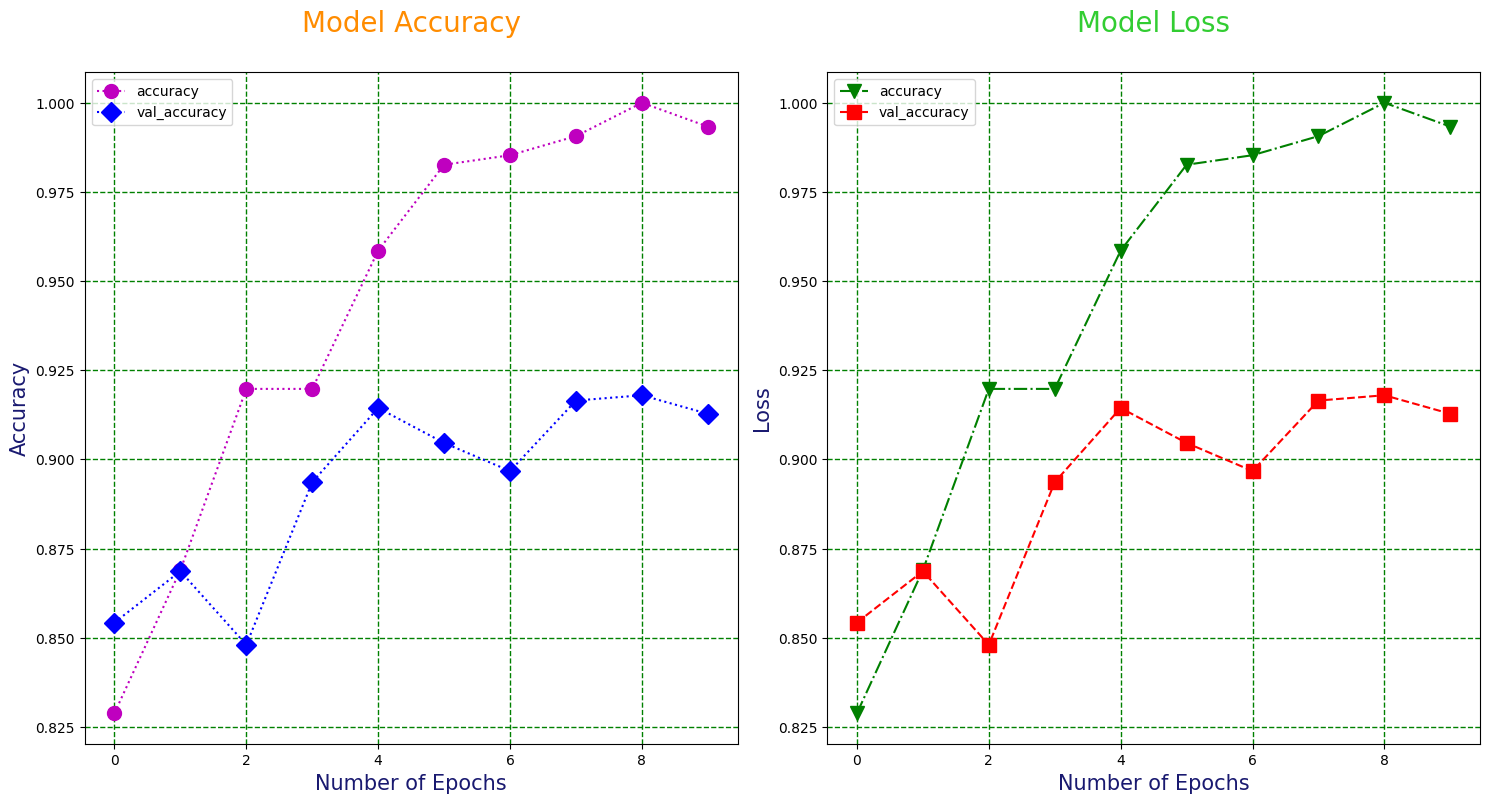

In [41]:
model_loss_and_accuracy(history)

# F1 Score

211/211 [==============================] - 29s 137ms/step


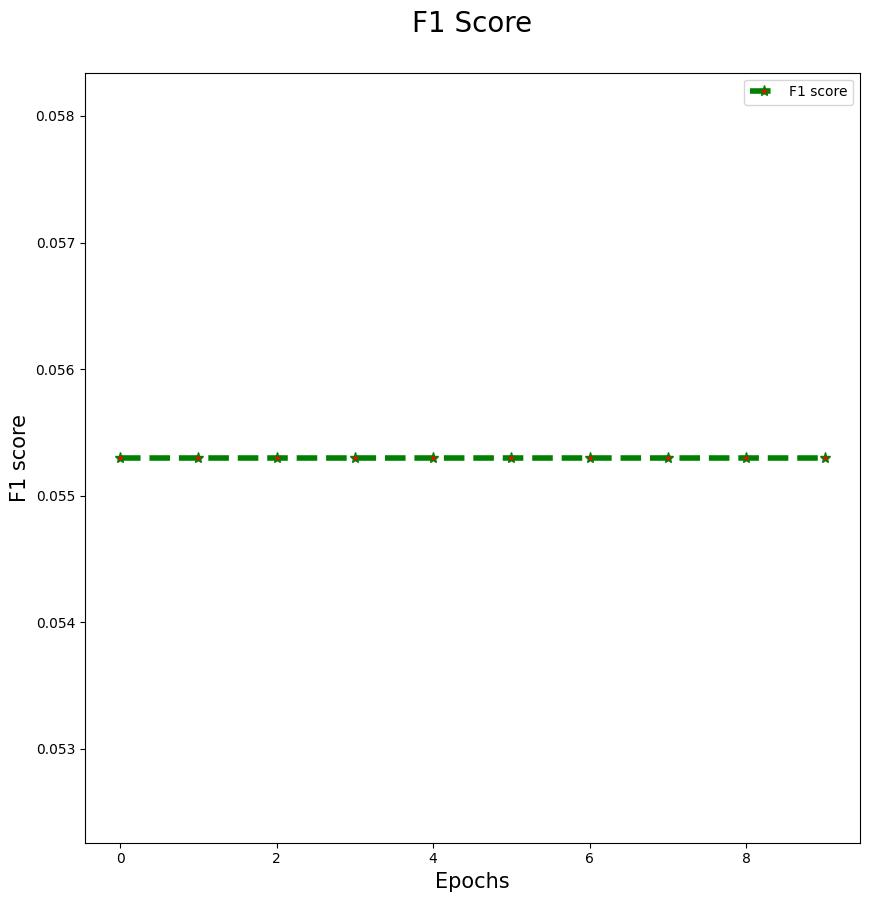

In [42]:
def plot_f1_score(history):
    f1_scores = []
    for epoch in range(len(history.history['val_loss'])):
        model.set_weights(history.model.get_weights())
        predictions = model.predict([X_test_input, test_mask])
        predictions = [round(p[0]) for p in predictions]
    
        f1_scores.append(f1_score(Y_test_label, predictions, average='weighted'))
    plt.figure(figsize=(10,10))
    plt.plot(range(len(history.history['val_loss'])), f1_scores, label='F1 score',marker="*",color="g",linestyle="--",linewidth=4,markersize=8,markerfacecolor="r")
    plt.title("F1 Score\n",color="black",fontsize=20)
    plt.xlabel('Epochs',fontsize=15,color="black")
    plt.ylabel('F1 score',fontsize=15,color="black")
    plt.legend()
    plt.show()


plot_f1_score(history)


# Label Names

In [43]:
label_name=["Negative","neutral", "Positive"]

In [44]:
pred=model.predict([X_test_input, test_mask])
prediction=np.argmax(pred, axis=1)

211/211 [==============================] - 29s 137ms/step


In [45]:
print(pred)

[[9.9999571e-01 4.3139139e-06]
 [9.9996328e-01 3.6703539e-05]
 [9.9999523e-01 4.7272902e-06]
 ...
 [9.9998796e-01 1.2058883e-05]
 [9.9999857e-01 1.4424552e-06]
 [9.9998736e-01 1.2635388e-05]]


# Accuracy Score

In [46]:
print("Accuracy Score is",accuracy_score(Y_test_label,prediction))

Accuracy Score is 0.9128045157456922


# ROC AUC Score

In [50]:
print("ROC AUC Score is {}".format(roc_auc_score(Y_test_label, pred[:,1], multi_class='ovr')))

ROC AUC Score is 0.919387861633247


# Average Precision Score

In [51]:
print(classification_report(Y_test_label, np.argmax(pred, axis=1)))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      5751
           1       0.79      0.54      0.64       981

    accuracy                           0.91      6732
   macro avg       0.86      0.76      0.80      6732
weighted avg       0.91      0.91      0.91      6732

